#XGBoost

##Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
import xgboost as xgb

In [ ]:
!gdown --id texto

In [ ]:
datos=pd.read_csv("final-ok.csv", decimal=",", header=0)
df = pd.DataFrame(datos)
df.drop(['Fecha'], axis='columns', inplace=True)
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
X_multiple = df[['Tension DC', 'Corriente AC', 'Tension AC', 'Potencia aparente',
                 'Potencia reactiva', 'Frecuencia', 'Factor de potencia', 'Energia total',
                 'Energia diaria', 'Corriente DC', 'Potencia DC', 'Irradiancia',
                 'Temp modulo', 'Temp ambiente']]

y_multiple = df['Potencia activa']

##Search n_estimators

[22:59:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator N°:  1
[22:59:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator N°:  2
[22:59:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator N°:  3
[22:59:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator N°:  4
[22:59:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator N°:  5
[22:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator N°:  6
[22:59:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

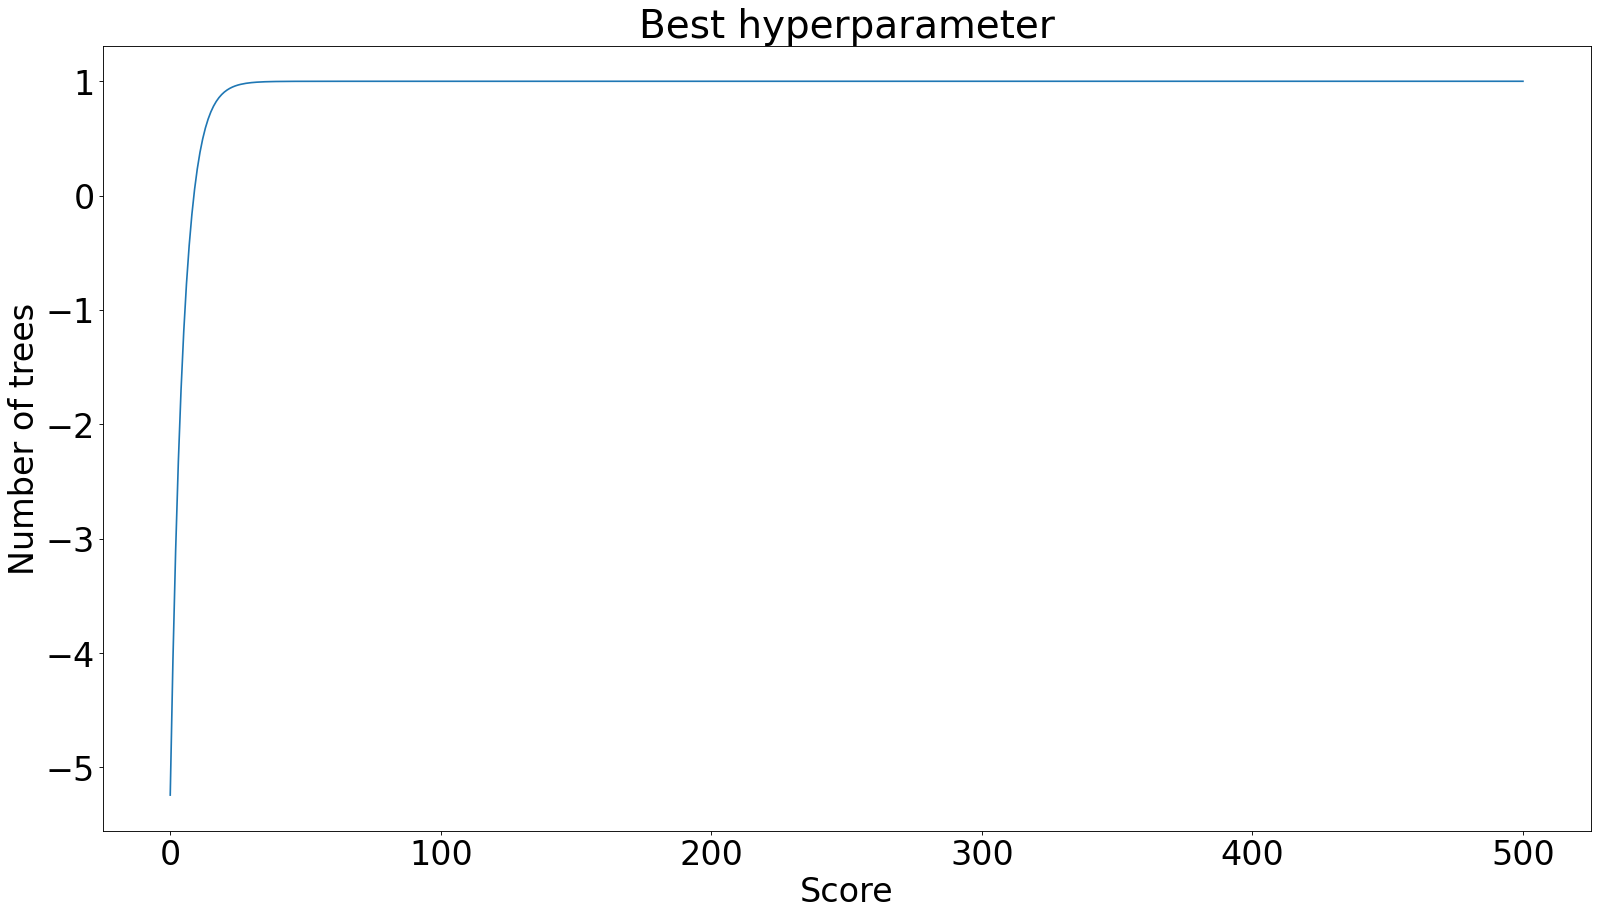

In [ ]:
from sklearn.model_selection import train_test_split
Porcentaje=0.20
#Semilla = 7494
Semilla = 0
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple,
                                                    test_size=Porcentaje,
                                                    random_state=Semilla)
variable=0
b=0.0
c=0.0
lista = []
lista2 = []
from sklearn.model_selection import train_test_split
while variable <= 500:
    regressor = xgb.XGBRegressor (n_estimators = variable)
    regressor.fit(X_train, y_train)
    a=regressor.score(X_train, y_train)
    lista.append(a)
    if a > b:
        b = a
        c = variable
    lista2.append(variable)
    variable = variable+1
    print("n_estimator N°: ",variable)
        
print ("Score con la mejor variable: ", b)
print ("El valor de la semilla es: ", c)
plt.figure(figsize=(24, 13), dpi=80)
plt.plot(lista2, lista)
plt.rc('ytick', labelsize=30) 
plt.rc('xtick', labelsize=30)
plt.xlabel("Score", fontsize=30)
plt.ylabel("Number of trees", fontsize=30)
plt.title("Best hyperparameter", size = 35)
#plt.show()
plt.savefig("/content/drive/MyDrive/Ordenador/XGBoost-n_estimators.png", bbox_inches='tight')

##Search Seed

[01:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Semilla N°:  1
[01:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Semilla N°:  2
Score con la mejor semilla:  0.9998006254450125
El valor de la semilla es:  1


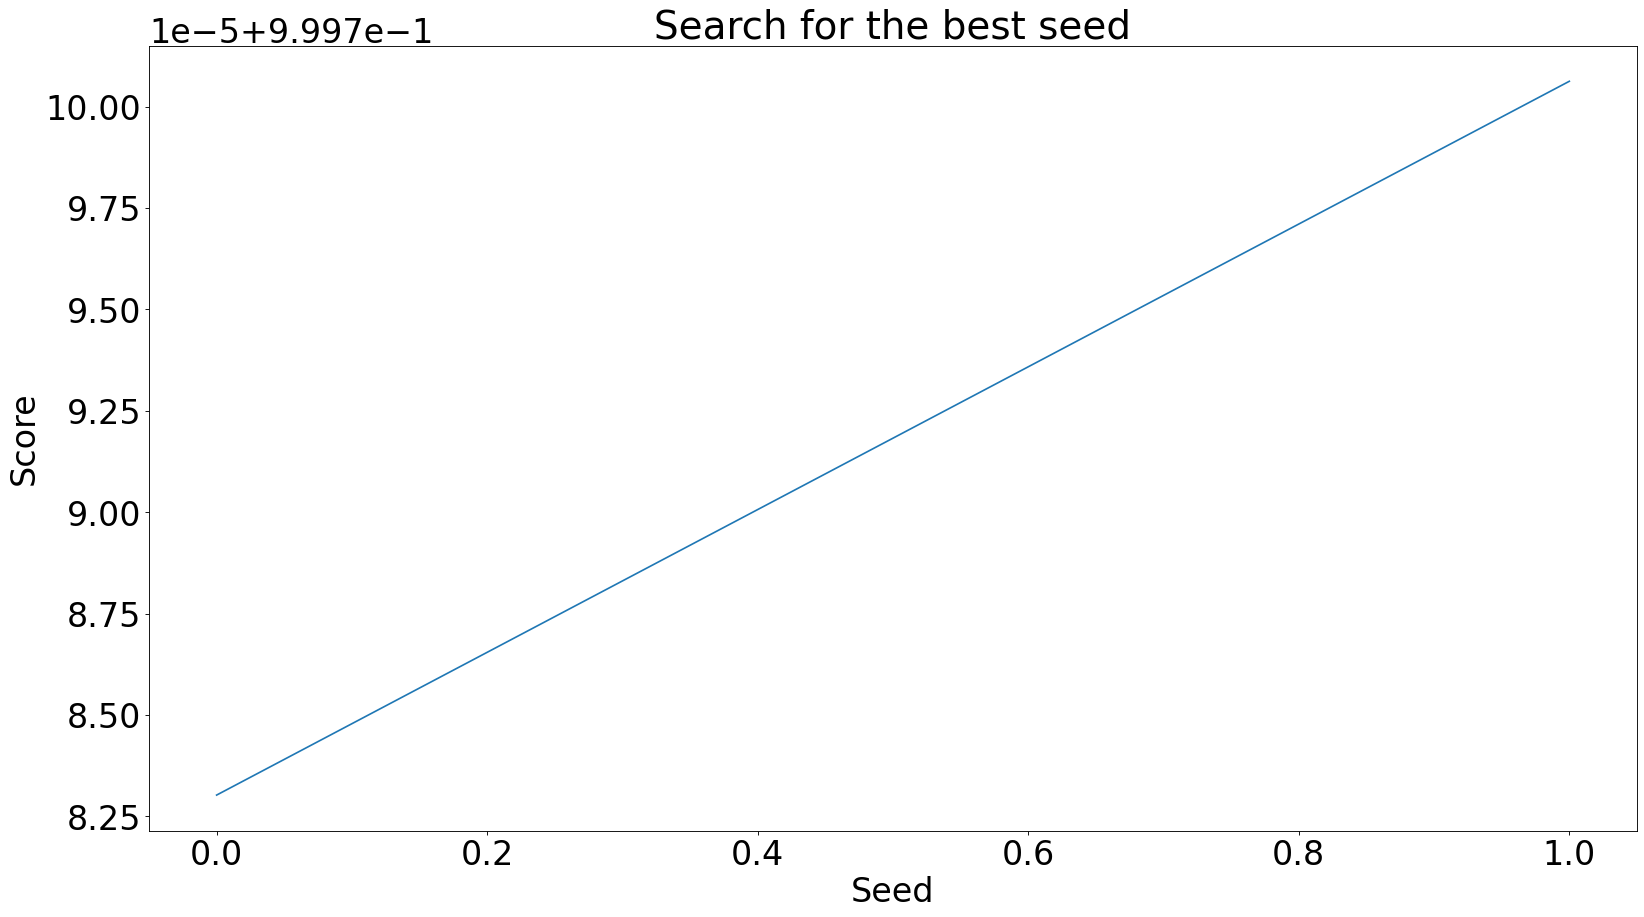

In [ ]:
Porcentaje=0.20
Semilla = 0
variable = 100

reg = xgb.XGBRegressor(n_estimators = variable)
b=0.0
c=0.0
lista = []
lista2 = []
from sklearn.model_selection import train_test_split

while Semilla < 2:
    X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple,
                                                        test_size=0.20,
                                                        random_state=Semilla)
    reg.fit(X_train, y_train)
    a=reg.score(X_train, y_train)
    lista.append(a)
    if a > b:
        b = a
        c = Semilla
    lista2.append(Semilla)
    Semilla = Semilla + 1
    print("Semilla N°: ", Semilla)

print ("Score con la mejor semilla: ", b)
print ("El valor de la semilla es: ", c)
plt.figure(figsize=(24, 13), dpi=80)
plt.plot(lista2, lista)
plt.rc('ytick', labelsize=30) 
plt.rc('xtick', labelsize=30)
plt.xlabel("Seed", fontsize=30)
#plt.xlabel("Semilla", fontsize=30)
plt.ylabel("Score", fontsize=30)
#plt.ylabel("Puntuación", fontsize=30)
plt.title("Search for the best seed", size = 35)
#plt.title("Busqueda de la mejor semilla", size = 35)
plt.savefig("/content/drive/MyDrive/Ordenador/XGBoost-Seed.png", bbox_inches='tight')

##XGboost

###Run Model

In [ ]:
descripcion=df.describe()
descripcion.to_excel("XGBoost-descripcion.xlsx")

Porcentaje=0.20
Semilla = 7494
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple,
                                                    test_size=Porcentaje,
                                                    random_state=Semilla)

#Defino el algoritmo a utilizar
variable = 500
reg = xgb.XGBRegressor(n_estimators = variable)
#Entreno el modelo
reg.fit(X_train, y_train)

[01:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print("###########################")
print('Score - Train del modelo: XGBoost')
print(reg.score(X_train, y_train))
print("###########################")
print('Score - Test del modelo: XGBoost')
print(reg.score(X_test, y_test))
print("###########################")

from sklearn import metrics

y_pred_xgb = reg.predict(X_test)
r_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)

print('MAE del modelo:XGBoost')
print(r_xgb)
print("###########################")

r2_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))

print('MSE del modelo: XGBoost')
print(r2_xgb)
print("###########################")

modelo_r2_xgb = metrics.r2_score(y_test, y_pred_xgb)

print('Coef. Determinacion del modelo: XGBoost')
print(modelo_r2_xgb)
print("###########################")


modelo_r2_ajustada_xgb =1-(1-modelo_r2_xgb)*(len(y_multiple)-1)/(len(y_multiple)-X_multiple.shape[1]-1)

print('Coef. Determinacion Ajustado del modelo: XGBoost')
print(modelo_r2_ajustada_xgb)

# print("###########################")
# print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE - XGBoost')
# print('Valor de las pendientes o coeficientes "a":')
# print(reg.coef_)
# print('Valor de la intersección o coeficiente "b":')
# print(reg.intercept_)

###########################
Score - Train del modelo: XGBoost
0.9999035025547601
###########################
Score - Test del modelo: XGBoost
0.9998830584272762
###########################
MAE del modelo:XGBoost
5.344767836900095
###########################
MSE del modelo: XGBoost
7.62193529261607
###########################
Coef. Determinacion del modelo: XGBoost
0.9998830584272762
###########################
Coef. Determinacion Ajustado del modelo: XGBoost
0.9998830451282061


###Linealidad

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


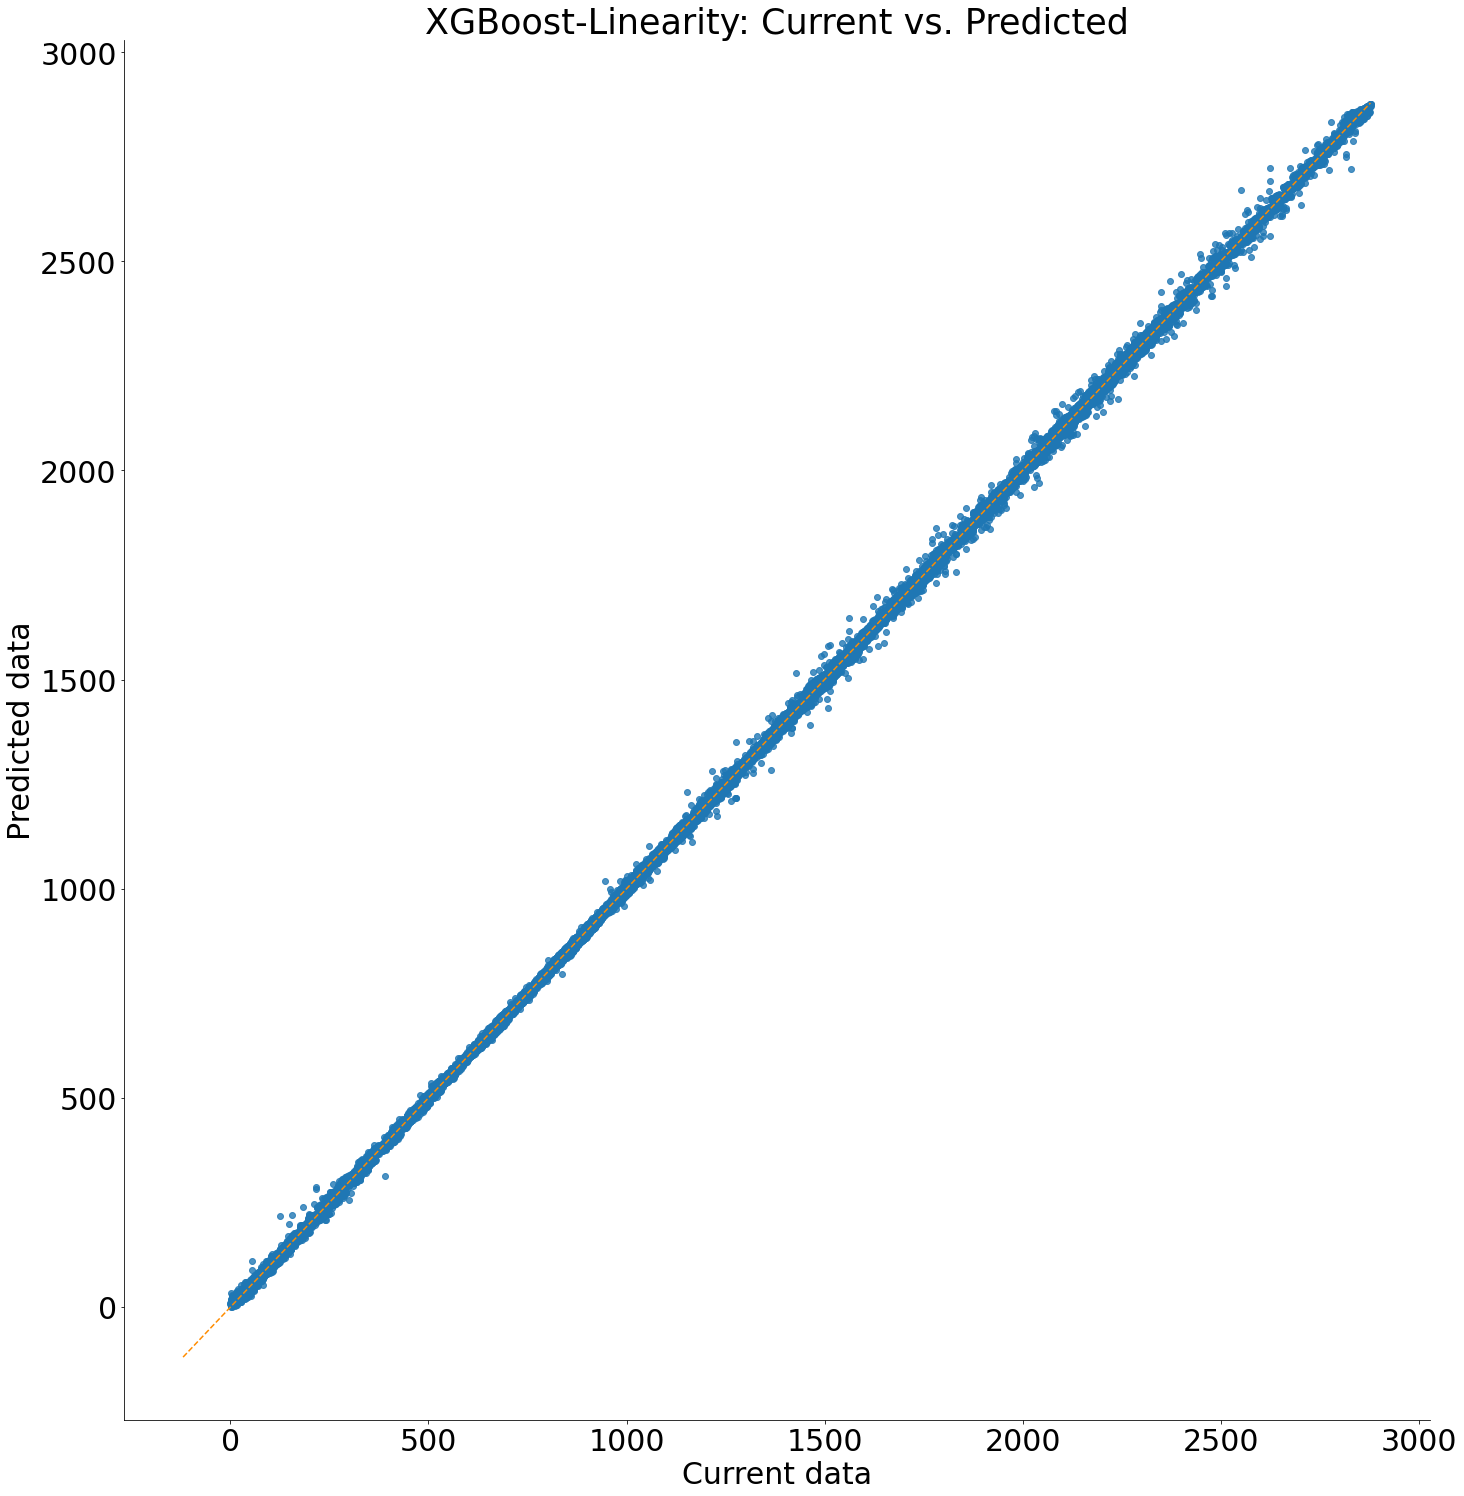

In [ ]:
import seaborn as sns
import time

def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

def linear_assumption(model, features, label, titulo1):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    '''
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    '''
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=20)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    plt.xlabel("Current data", fontsize=30)
    #plt.xlabel("Datos actuales", fontsize=30)
    plt.ylabel("Predicted data", fontsize=30)
    #plt.ylabel("Datos pronosticados", fontsize=30)
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title(titulo1, size = 35)
    #plt.show()
    titulo1_img="/content/drive/MyDrive/Ordenador/XGBoost-"+titulo1+".png"
    plt.savefig(titulo1_img, bbox_inches='tight')


calculate_residuals(reg, X_train, y_train)
linear_assumption(reg, X_train, y_train, "XGBoost-Linearity: Current vs. Predicted")

###Normality of the Error Terms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Los residuos no se distribuyen normalmente:  XGBoost-Distribution of Residuals


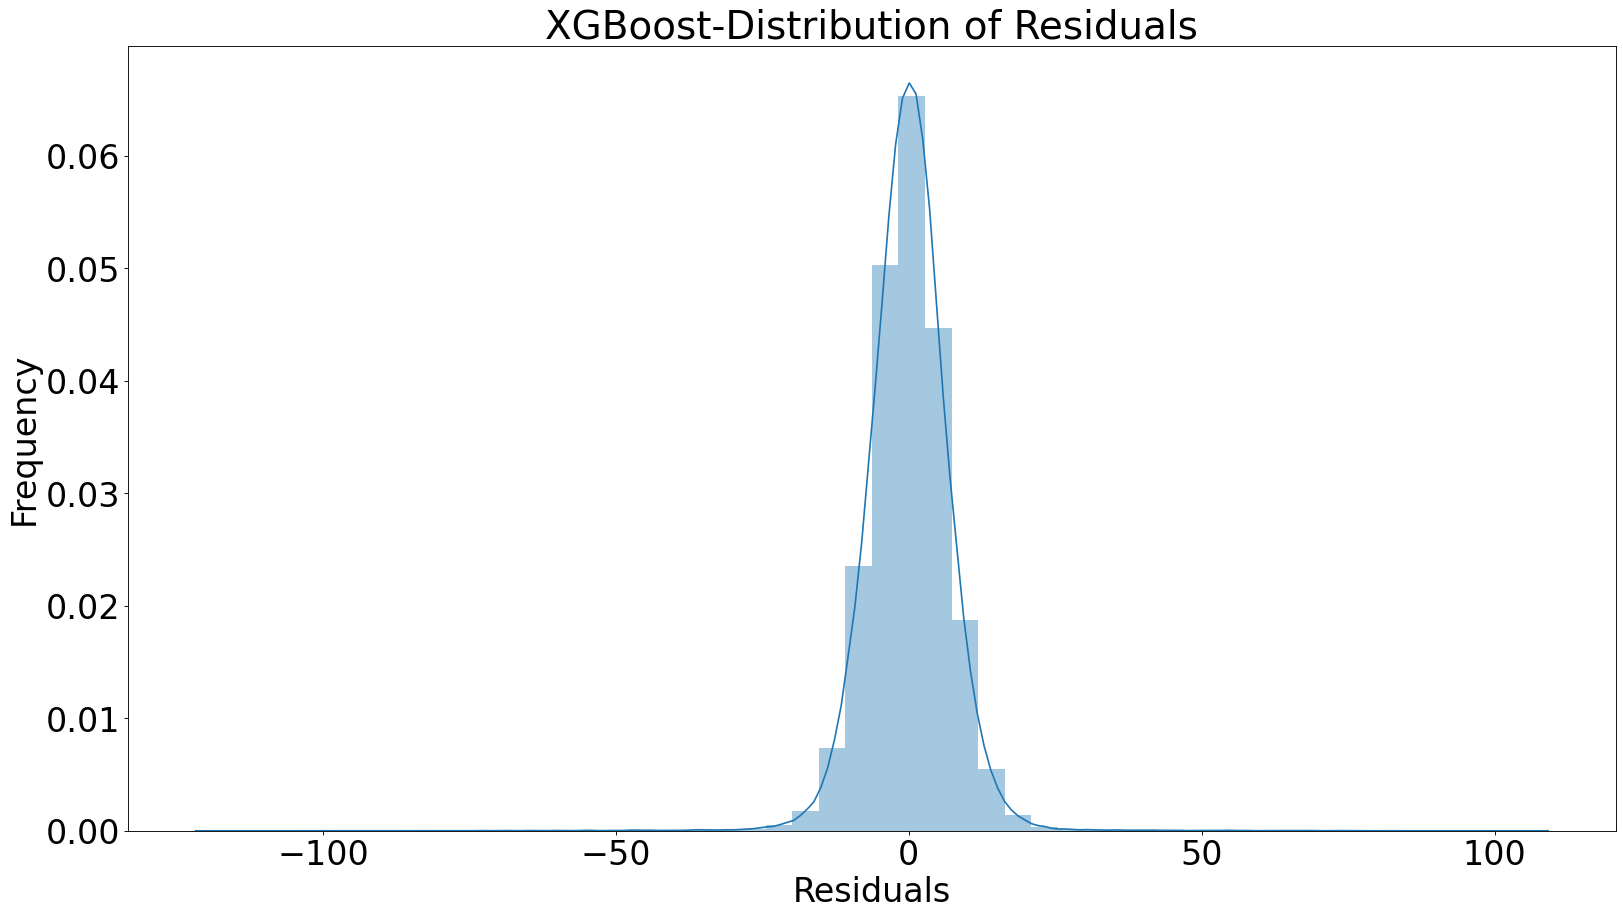

In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh , titulo2):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    #print('Supuesto 2: los términos de error se distribuyen normalmente', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    #print('Usando la prueba Anderson-Darling para distribución normal')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    #print('Valor p de la prueba: por debajo de 0.05 generalmente significa no normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Los residuos no se distribuyen normalmente: ', titulo2)
    else:
        print('Los residuos se distribuyen normalmente ', titulo2)
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(24, 13), dpi=80)
    plt.title(titulo2, size=35)
    plt.rc('xtick', labelsize=30) 
    plt.rc('xtick', labelsize=30)
    sns.distplot(df_results['Residuals'])
    plt.xlabel("Residuals", fontsize=30)
    #plt.xlabel("Residuos", fontsize=30)
    plt.ylabel("Frequency", fontsize=30)
    #plt.ylabel("Frecuencia", fontsize=30)
    #plt.show()
    titulo2_img="/content/drive/MyDrive/Ordenador/XGBoost-"+titulo2+".png"
    plt.savefig(titulo2_img, bbox_inches='tight')
    
    # print()
    # if p_value > p_value_thresh:
    #     print('Assumption satisfied')
    # else:
    #     print('Assumption not satisfied')
    #     print()
    #     print('Confidence intervals will likely be affected')
    #     print('Try performing nonlinear transformations on variables')

normal_errors_assumption(reg, X_train, y_train,0.05 , "XGBoost-Distribution of Residuals")

###Correlation

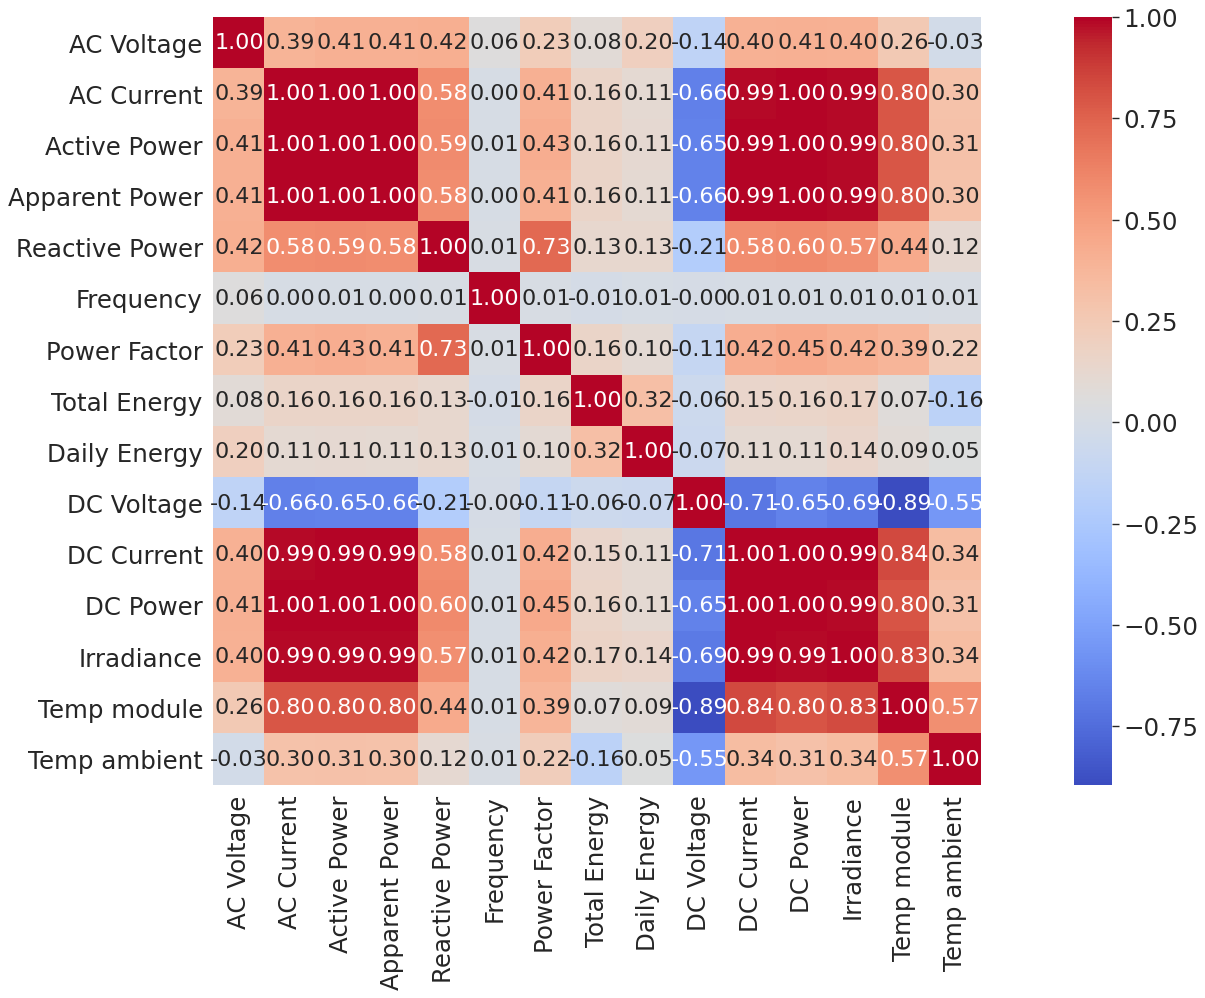

In [ ]:
cols = ['AC Voltage', 'AC Current', 'Active Power', 'Apparent Power',
        'Reactive Power', 'Frequency', 'Power Factor', 'Total Energy',
        'Daily Energy', 'DC Voltage', 'DC Current', 'DC Power', 'Irradiance',
        'Temp module', 'Temp ambient']
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df.iloc[:,range(0,15)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(24, 13), dpi=80)
sns.set(font_scale=2)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 20},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
#plt.title('Covariance matrix showing correlation coefficients', size = 24)
plt.tight_layout()
#plt.show()
titulo3_img="/content/drive/MyDrive/Ordenador/XGBoost-Correlacion.png"
plt.savefig(titulo3_img, bbox_inches='tight')

###Autocorrelation

In [ ]:
print('Assumption 4: No Autocorrelation', '\n')
print('Performing Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')

def autocorrelation_assumption(model, features, label, titulo3):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """

    print("##############", titulo3 , "################")
    from statsmodels.stats.stattools import durbin_watson
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation')
        print('Assumption satisfied')

autocorrelation_assumption(reg, X_train, y_train, "XGBoost-autocorrelation")

Assumption 4: No Autocorrelation 

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
############## XGBoost-autocorrelation ################
Durbin-Watson: 2.0069454226981627
Little to no autocorrelation
Assumption satisfied


###Homoscedasticity

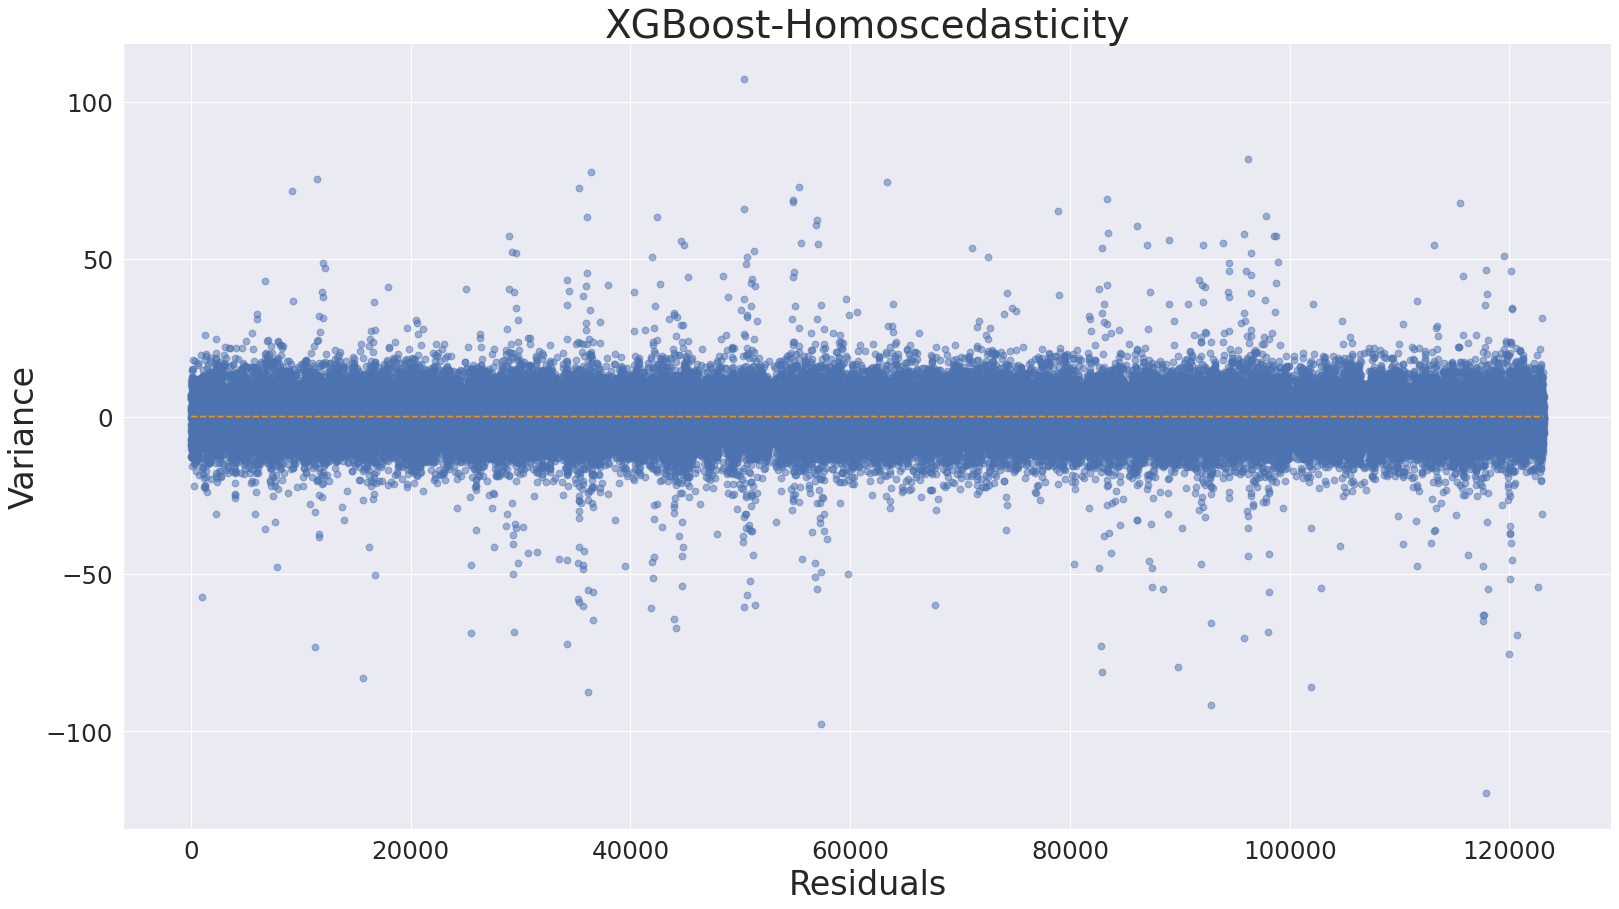

In [ ]:
####################### Homocedasticidad #######################
def homoscedasticity_assumption(model, features, label, titulo4):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    # print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    # print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(24, 13), dpi=80)
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    plt.xlabel("Residuals", fontsize=30)
    #plt.xlabel("Residuos", fontsize=30)
    plt.ylabel("Variance", fontsize=30)
    #plt.ylabel("Varianza", fontsize=30)
    plt.title(titulo4, size=35)
    #plt.show()
    titulo4_img="/content/drive/MyDrive/Ordenador/XGBoost-"+titulo4+".png"
    plt.savefig(titulo4_img, bbox_inches='tight')

homoscedasticity_assumption(reg, X_train, y_train, "XGBoost-Homoscedasticity")

###Time Train - Test

In [ ]:
from datetime import datetime

#Defino el algoritmo a utilizar
reg = xgb.XGBRegressor(n_estimators = variable)

#Entreno el modelo
inicialBayesiano = datetime.now()
reg.fit(X_train, y_train)
finalBayesiano = datetime.now()
tiempoBayesiano = finalBayesiano - inicialBayesiano # Devuelve un objeto timedelta
print ("El tiempo de entranmiento-XGBoost es: ",tiempoBayesiano)

#############################################################
pred_inicialBayesiano = datetime.now()
Y_pred_Bayesiano = reg.predict(X_test)
pred_finalBayesiano = datetime.now()
pred_tiempoBayesiano = pred_finalBayesiano - pred_inicialBayesiano # Devuelve un objeto timedelta
print ("El tiempo de test-XGBoost es: ",pred_tiempoBayesiano)



[01:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
El tiempo de entranmiento-XGBoost es:  0:00:36.419202
El tiempo de test-XGBoost es:  0:00:00.383562
